In [1]:
# для создания 3D-проекции
from mpl_toolkits import mplot3d

# для манипулирования данными
import numpy as np
import matplotlib.pyplot as plt

# чтобы отображать графики в блокноте. Это избавляет нас от необходимости постоянно вызывать plt.show ()
%matplotlib inline

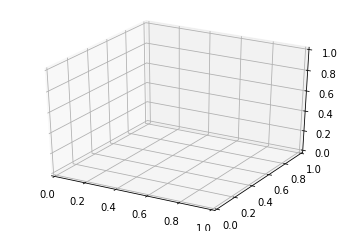

In [2]:
# Для начала создадим 3D-оси. 
# Мы передаем projection = '3d' в plt.axes, который возвращает здесь объект Axes3DSubplot. 
# Это пустой холст, на котором мы будем рисовать.

ax = plt.axes(projection='3d')

In [3]:
# мы будем использовать Laplacian of Gaussian (LoG), который является фильтром, который часто используется 
# для обнаружения краев в компьютерном зрении.
# Это быстрый и простой код Python для генерации матрицы Лапласа Гаусса:

import numpy as np
def LoG(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

In [4]:
# Генерация некоторых тестовых данных
# сгенерируем некоторые тестовые данные. Все X2, Y2, Z2 ниже являются 2d массивами размером 49 × 49. 
# X1, Y1 и Z1 - одномерные массивы
# Эти 1d-массивы будут использованы позже для рисования некоторых графиков.

N = 49
half_N = N // 2
X2, Y2 = np.meshgrid(range(N), range(N))
Z2 = -LoG(X2 - half_N, Y2 - half_N, sigma=8)
X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)

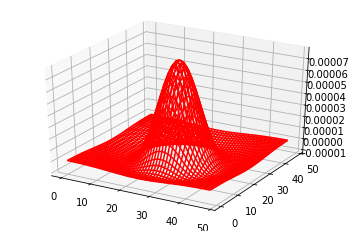

In [5]:
# Начнем с каркасного графика, который является самым основным графиком, просто соединяя соседние точки на сетке.

ax = plt.axes(projection='3d')
ax.plot_wireframe(X2, Y2, Z2, color='r')

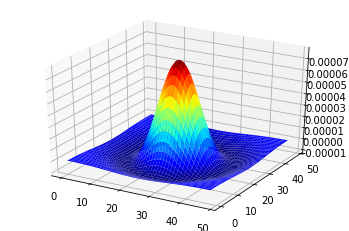

In [6]:
# Поверхность
# Одним из недостатков графика поверхности является то, что он затеняет часть данных, поскольку поверхность непрозрачна. 

ax = plt.axes(projection='3d')
ax.plot_surface(X2, Y2, Z2, cmap='jet')

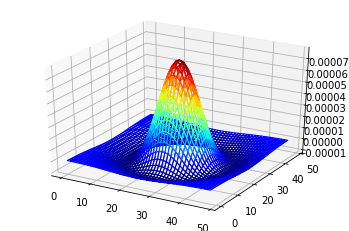

In [7]:
from matplotlib import cm
# Normalize the colors based on Z value
norm = plt.Normalize(Z2.min(), Z2.max())
colors = cm.jet(norm(Z2))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(X2, Y2, Z2, facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))

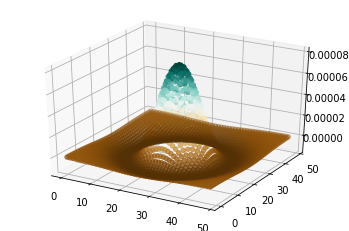

In [8]:
# Диаграмма рассеяния

ax = plt.axes(projection='3d')
ax.scatter(X1, Y1, Z1, c=Z1, cmap='BrBG', linewidth=1)

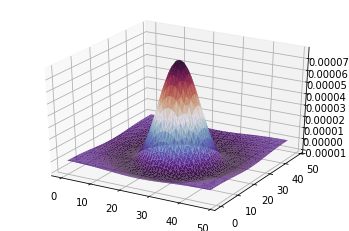

In [9]:
# создаем поверхность, сначала находя набор треугольников, образованных между соседними точками.
ax = plt.axes(projection='3d')
ax.plot_trisurf(X1, Y1, Z1, cmap='twilight_shifted')

In [11]:
# еще пример построения поверхности

from mpl_toolkits.mplot3d import axes3d

from matplotlib import cm

X, Y, Z = axes3d.get_test_data(0.2)

# Normalize to [0,1]
norm = plt.Normalize(Z.min(), Z.max())
colors = cm.viridis(norm(Z))
rcount, ccount, _ = colors.shape

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rcount=rcount, ccount=ccount,
                       facecolors=colors, shade=False)
surf.set_facecolor((0,0,0,0))
plt.show()